In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ml models decistion tree
from sklearn.tree import DecisionTreeClassifier

# One of the Ensemle model -- Random Forset which is ensemple of decision trees
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# import logistic regression, SVC  for ensembling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# split the data into test and train
from sklearn.model_selection import train_test_split

# packages for metric for evalaution of the models
from sklearn.metrics import classification_report , accuracy_score

# to save the models so that we don't need to train the models every time we need to do prediction
from sklearn.externals import joblib



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
df = pd.read_csv(r'datasets\1b-crest-after-numeric-preprocessing.csv')

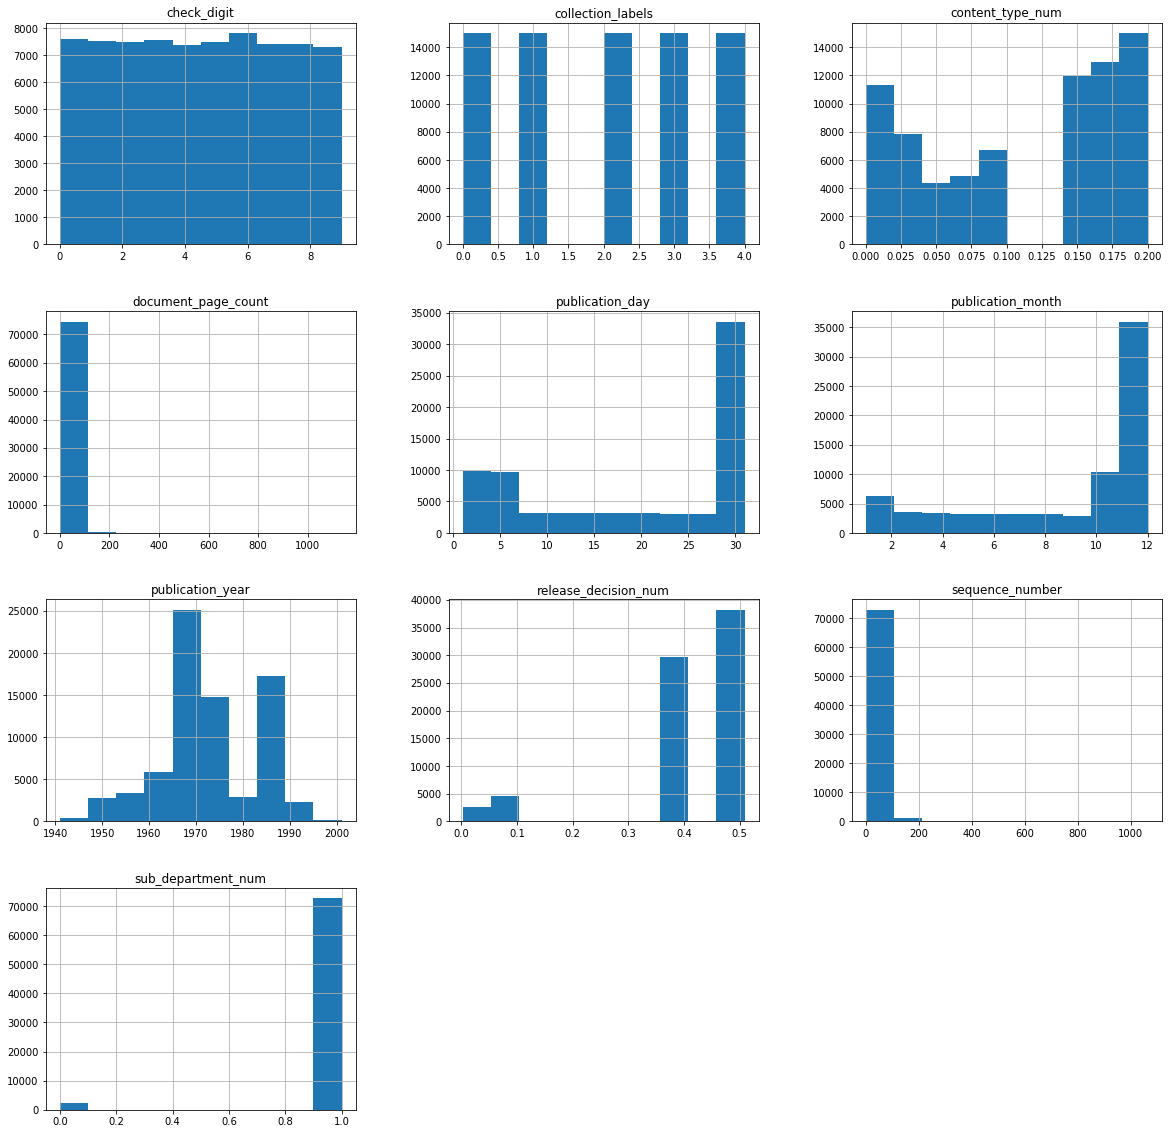

In [4]:
# plot histogram for each parameter
df.hist(figsize=(20,20))
plt.show()

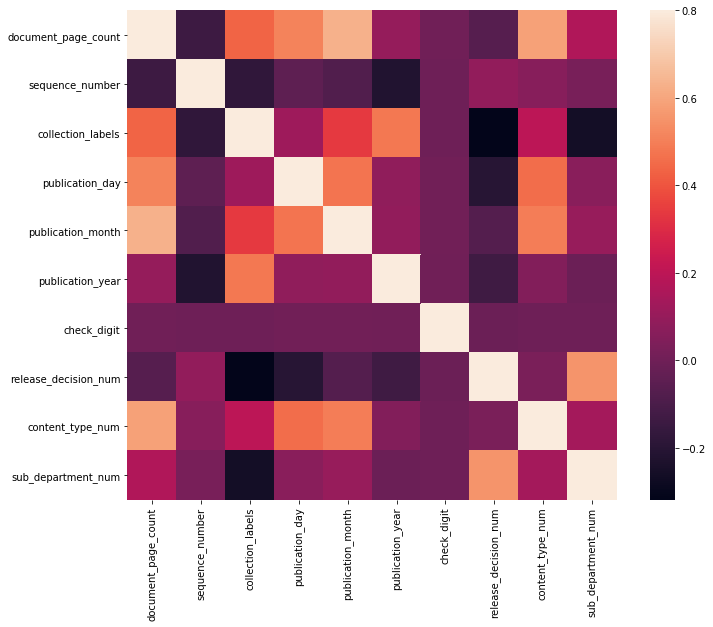

In [5]:
# it can be easily seen, this is also a class imbalance problem
# let's see the correlation between the features
corr_matrix = df.corr()

# plot the correlation matrix's heatmap
fig = plt.figure( figsize= (12, 9 ) )
sns.heatmap(corr_matrix, vmax= .8, square= True )

In [5]:
df.columns

Index(['collection', 'document_number', 'release_decision',
       'document_page_count', 'sequence_number', 'publication_date',
       'content_type', 'collection_labels', 'publication_day',
       'publication_month', 'publication_year', 'sub_department',
       'sub_department_num', 'check_digit', 'release_decision_num',
       'content_type_num'],
      dtype='object')

In [6]:
# prepare for training
X = df[['document_page_count', 'sequence_number', 'publication_day', 'publication_month', 'publication_year',
       'check_digit', 'release_decision_num', 'content_type_num', 'sub_department_num']]
Y = df['collection_labels']


In [7]:
X.head(2)

,document_page_count,sequence_number,publication_day,publication_month,publication_year,check_digit,release_decision_num,content_type_num,sub_department_num
0,3.0,16,31,10,1986,9,0.508693,0.064947,1
1,10.0,2,22,6,1983,0,0.508693,0.064947,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 4)

In [17]:
# Now our data is ready with test-train split 
# let's start with decision tree and then we deep dive

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
# save decesion tree model
filepath = r'saved-models-joblib\trained-on-numeric\iteration1-23March\decision_tree_model'
joblib.dump(dt ,filepath )

In [19]:
# load model for prediction
decision_tree_model = joblib.load(r'saved-models-joblib\trained-on-numeric\iteration1-23March\decision_tree_model')

In [20]:
print("Accuracy = ")
print(decision_tree_model.score(X_test, y_test))
print("\n")
y_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=df['collection'].unique()))

#print(metrics.classification_report(y_test, y_pred, target_names=df['collection'].unique()))

Accuracy = 
0.9614


                           precision    recall  f1-score   support

      General_CIA_Records       0.93      0.89      0.91      2995
              NGA_Records       0.92      0.94      0.93      2984
     Scientific_Abstracts       1.00      1.00      1.00      3011
Consolidated_Translations       1.00      1.00      1.00      2990
                     Misc       0.96      0.98      0.97      3020

              avg / total       0.96      0.96      0.96     15000



In [21]:
# checking how LogisticRegression works?
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# save the logistic regression model
filepath = r'saved-models-joblib\trained-on-numeric\iteration1-23March\LogisticRegression_model'
joblib.dump(lr ,filepath )


In [23]:
print("Accuracy = ")
print(lr.score(X_test, y_test))
print("\n")

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=df['collection'].unique()))

Accuracy = 
0.7627333333333334


                           precision    recall  f1-score   support

      General_CIA_Records       0.51      0.50      0.50      2995
              NGA_Records       0.54      0.62      0.58      2984
     Scientific_Abstracts       0.98      0.99      0.99      3011
Consolidated_Translations       0.98      0.98      0.98      2990
                     Misc       0.82      0.72      0.77      3020

              avg / total       0.77      0.76      0.76     15000



In [24]:
#  SVM with polynomial kernal
svm = SVC(kernel='poly' , degree= 2)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# save the svm model
filepath = r'saved-models-joblib\trained-on-numeric\iteration1-23March\SVM_model'
joblib.dump(svm ,filepath )
# load model for prediction
svm = joblib.load(filepath)

In [26]:
print("Accuracy = ")
print(svm.score(X_test, y_test))
print("\n")

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, target_names=df['collection'].unique()))

Accuracy = 
0.8332666666666667


                           precision    recall  f1-score   support

      General_CIA_Records       0.60      0.60      0.60      2995
              NGA_Records       0.72      0.66      0.69      2984
     Scientific_Abstracts       1.00      1.00      1.00      3011
Consolidated_Translations       1.00      1.00      1.00      2990
                     Misc       0.84      0.90      0.87      3020

              avg / total       0.83      0.83      0.83     15000



In [27]:
# let's try how ensemling ( Random forest wit 10 decision trees ) performs 
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
# save the svm model
filepath = r'saved-models-joblib\trained-on-numeric\iteration1-23March\random_forest_model'
joblib.dump(random_forest ,filepath )
# load model for prediction
random_forest = joblib.load(filepath)

In [29]:
print("Accuracy = ")
print(random_forest.score(X_test, y_test))
print("\n")
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=df['collection'].unique()))

Accuracy = 
0.9674666666666667


                           precision    recall  f1-score   support

      General_CIA_Records       0.93      0.91      0.92      2995
              NGA_Records       0.92      0.96      0.94      2984
     Scientific_Abstracts       1.00      1.00      1.00      3011
Consolidated_Translations       1.00      1.00      1.00      2990
                     Misc       0.98      0.97      0.98      3020

              avg / total       0.97      0.97      0.97     15000



In [63]:
# Random Forest is performing better than Decision tree.Ensemling improved precision and F1-score.
# let's try bagging classifier
# We will give 20 Decisions Trees, each with 50% of training dataset and 100% features
bg = BaggingClassifier( DecisionTreeClassifier() , max_samples = 0.5 , max_features= 1.0 , n_estimators=20 )
bg.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [64]:
# save the baggign classifier model
filepath = r'saved-models-joblib\iteration1-23March\BaggingClassifier_model'
joblib.dump(bg ,filepath )
# load model for prediction
bg = joblib.load(filepath)

In [65]:
print("Accuracy = ")
print(bg.score(X_test, y_test))
print("\n")

y_pred = bg.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy = 
0.9683333333333334


             precision    recall  f1-score   support

          0       0.94      0.91      0.92      2995
          1       0.92      0.96      0.94      2984
          2       1.00      1.00      1.00      3011
          3       1.00      1.00      1.00      2990
          4       0.98      0.97      0.98      3020

avg / total       0.97      0.97      0.97     15000



In [66]:
# let's see the performance of BoostingClassifier -ADABoost
# 10 decision trees , learning rate will shrink the contribution of each individual learner 
adaboost = AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 )
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=10, random_state=None)

In [67]:
# save the adaboost classifier model
filepath = r'saved-models-joblib\iteration1-23March\adaboost_model'
joblib.dump(adaboost ,filepath )
# load model for prediction
adaboost = joblib.load(filepath)

In [68]:
print("Accuracy = ")
print(adaboost.score(X_test , y_test))

print("\n")

y_pred_adaboost = adaboost.predict(X_test)
print(classification_report(y_test , y_pred_adaboost))

Accuracy = 
0.9661333333333333


             precision    recall  f1-score   support

          0       0.93      0.90      0.92      2995
          1       0.93      0.95      0.94      2984
          2       1.00      1.00      1.00      3011
          3       1.00      1.00      1.00      2990
          4       0.97      0.98      0.97      3020

avg / total       0.97      0.97      0.97     15000



In [1]:
# let's have our own ensembles method
# a combination of decesion tree, SVM, Logistic Regression
#lr = LogisticRegression()
#dt = DecisionTreeClassifier()
# svm will have ploynomial of degree two
#svm = SVC(kernel='poly' , degree= 2)

# votoing hard means votes on the labels not on the probabilities
ensemble_vc = VotingClassifier( estimators=[ ('adaboost', adaboost) , 
                                            ('random_forest', random_forest) , 
                                            ('bg', bg)] , voting='hard' )

NameError: name 'VotingClassifier' is not defined

In [75]:
ensemble_vc.fit(X_train , y_train)

VotingClassifier(estimators=[('adaboost', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_sa...estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [77]:
# save the custom ensembling classifier model 
filepath = r'saved-models-joblib\iteration1-23March\ensemble_voting_classifier_model'
joblib.dump(ensemble_vc ,filepath )
# load model for prediction
ensemble_vc = joblib.load(filepath)

In [78]:
print("Accuracy = ")
print(ensemble_vc.score(X_test, y_test))
print("\n")

# print the metrices for our ensemmbled model
y_pred_ensemble_vc = ensemble_vc.predict(X_test)
print( classification_report(y_test , y_pred_ensemble_vc) )

Accuracy = 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9713333333333334


             precision    recall  f1-score   support

          0       0.95      0.92      0.93      2995
          1       0.93      0.96      0.95      2984
          2       1.00      1.00      1.00      3011
          3       1.00      1.00      1.00      2990
          4       0.98      0.98      0.98      3020

avg / total       0.97      0.97      0.97     15000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
